In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [0]:
#Reading dataset and visualising
df = churn_df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,precondition
0,0,M,18.770,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.060900,0.1953,0.06083,0.6422,1.530,4.369,88.25,0.007548,0.03897,0.03914,0.018160,0.02168,0.004445,24.54,34.37,161.10,1873.0,0.1498,0.48270,0.4634,0.20480,0.3679,0.09870,lung
1,1,M,13.610,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.030850,0.1761,0.06130,0.2310,1.005,1.752,19.83,0.004088,0.01174,0.01796,0.006880,0.01323,0.001465,16.89,35.64,113.20,848.7,0.1471,0.28840,0.3796,0.13290,0.3470,0.07900,heart
2,2,B,12.270,17.92,78.41,466.1,0.08685,0.06526,0.03211,0.026530,0.1966,0.05597,0.3342,1.781,2.079,25.79,0.005888,0.02310,0.02059,0.010750,0.02578,0.002267,14.10,28.88,89.00,610.2,0.1240,0.17950,0.1377,0.09532,0.3455,0.06896,lung
3,3,B,11.340,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.025940,0.1927,0.06211,0.2430,1.010,1.491,18.19,0.008577,0.01641,0.02099,0.011070,0.02434,0.001217,12.47,23.03,79.15,478.6,0.1483,0.15740,0.1624,0.08542,0.3060,0.06783,heart
4,4,B,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,0.1580,0.06235,0.2957,1.363,2.054,18.24,0.007440,0.01123,0.02337,0.009615,0.02203,0.004154,10.93,25.59,69.10,364.2,0.1199,0.09546,0.0935,0.03846,0.2552,0.07920,heart


In [0]:
#Extracting predictors and labels
label = df['diagnosis']
df = df.drop(columns=['diagnosis'])

In [0]:
#Data preprocessing
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.info() # since only one object predictor so convert into dummies using below code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [0]:
#Converting precondition into dummy variable
df = pd.get_dummies(df, drop_first= True)
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,precondition_lung,precondition_other
0,18.770,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.060900,0.1953,0.06083,0.6422,1.5300,4.369,88.25,0.007548,0.03897,0.03914,0.018160,0.02168,0.004445,24.54,34.37,161.10,1873.0,0.14980,0.48270,0.46340,0.20480,0.3679,0.09870,1,0
1,13.610,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.030850,0.1761,0.06130,0.2310,1.0050,1.752,19.83,0.004088,0.01174,0.01796,0.006880,0.01323,0.001465,16.89,35.64,113.20,848.7,0.14710,0.28840,0.37960,0.13290,0.3470,0.07900,0,0
2,12.270,17.92,78.41,466.1,0.08685,0.06526,0.03211,0.026530,0.1966,0.05597,0.3342,1.7810,2.079,25.79,0.005888,0.02310,0.02059,0.010750,0.02578,0.002267,14.10,28.88,89.00,610.2,0.12400,0.17950,0.13770,0.09532,0.3455,0.06896,1,0
3,11.340,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.025940,0.1927,0.06211,0.2430,1.0100,1.491,18.19,0.008577,0.01641,0.02099,0.011070,0.02434,0.001217,12.47,23.03,79.15,478.6,0.14830,0.15740,0.16240,0.08542,0.3060,0.06783,0,0
4,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,0.1580,0.06235,0.2957,1.3630,2.054,18.24,0.007440,0.01123,0.02337,0.009615,0.02203,0.004154,10.93,25.59,69.10,364.2,0.11990,0.09546,0.09350,0.03846,0.2552,0.07920,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.660,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.024710,0.1792,0.05897,0.1402,0.5417,1.101,11.35,0.005212,0.02984,0.02443,0.008356,0.01818,0.004868,14.54,19.64,97.96,657.0,0.12750,0.31040,0.25690,0.10540,0.3387,0.09638,0,0
565,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.081720,0.2116,0.07325,0.3906,0.9306,3.093,33.67,0.005414,0.02265,0.03452,0.013340,0.01705,0.004005,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,0,0
566,9.405,21.70,59.60,271.2,0.10440,0.06159,0.02047,0.012570,0.2025,0.06601,0.4302,2.8780,2.759,25.17,0.014740,0.01674,0.01367,0.008674,0.03044,0.004590,10.85,31.24,68.73,359.4,0.15260,0.11930,0.06141,0.03770,0.2872,0.08304,0,0
567,13.880,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,0.1607,0.05474,0.2541,0.6218,1.709,23.12,0.003728,0.01415,0.01988,0.007016,0.01647,0.001970,15.51,19.97,99.66,745.3,0.08484,0.12330,0.10910,0.04537,0.2542,0.06623,1,0


In [0]:
#Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size = 0.33, random_state = 42)

In [0]:
#Applying Random Forest to our data
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
print('The accuracy of our model is:',clf.score(X_test, y_test))

The accuracy of our model is: 0.9521276595744681


In [0]:
#Checking if our accuracy is correct
print('The mean number of people having malignant cancer:',np.mean(label=='M'))
print('The mean number of people having benign cancer:',np.mean(label=='B'))

The mean number of people having malignant cancer: 0.37258347978910367
The mean number of people having benign cancer: 0.6274165202108963


Since the accuracy of the model is greater than the majority group mean, it means the model is a good fit.

In [0]:
#Ensuring accuracy by checking again
y_pred = clf.predict(X_test)
print('Confusion Matrix',confusion_matrix(y_test,y_pred))
print('Classification Report',classification_report(y_test,y_pred))
print('Accuracy score',accuracy_score(y_test, y_pred))

Confusion Matrix [[115   3]
 [  6  64]]
Classification Report               precision    recall  f1-score   support

           B       0.95      0.97      0.96       118
           M       0.96      0.91      0.93        70

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188

Accuracy score 0.9521276595744681


Text(0.5, 0, 'Feature Importances')

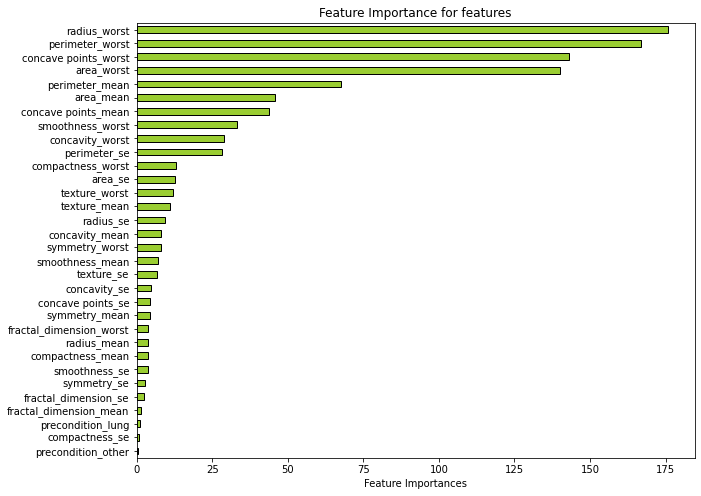

In [0]:
#Visualising the most important features
fi = clf.feature_importances_
features = np.array(df.columns)
df_fi = pd.DataFrame(fi*1000, features)
df_fi = df_fi.sort_values(0)
df_fi.plot(kind='barh', figsize = (10,8), color = 'yellowgreen', title = 'Feature Importance for features', legend = False, edgecolor = 'black')
plt.xlabel('Feature Importances')